In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
df_teams = pd.read_csv('../data1/MTeams.csv')
df_season = pd.read_csv('../data1/MSeasons.csv')
df_tourney_seeds = pd.read_csv('../data1/MNCAATourneySeeds.csv')
df_season_results = pd.read_csv('../data1/MRegularSeasonCompactResults.csv')
df_tourney_results = pd.read_csv('../data1/MNCAATourneyCompactResults.csv')

In [4]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024


In [5]:
df_teams.drop(['FirstD1Season', 'LastD1Season'], axis=1, inplace=True)

In [6]:
df_season.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [7]:
df_season.drop(['DayZero'], axis =1, inplace=True)

In [8]:
df_tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [9]:
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [10]:
df_season_results.drop(['NumOT'], axis=1, inplace=True)

In [11]:
df_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [12]:
df_tourney_results.drop(['NumOT'], axis=1, inplace=True)

In [13]:
df_total = pd.concat([df_teams, df_season_results, df_tourney_results])

In [14]:
df_total.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc
0,1101.0,Abilene Chr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1102.0,Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1103.0,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1104.0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1105.0,Alabama A&M,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189381 entries, 0 to 2450
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   TeamID    378 non-null     float64
 1   TeamName  378 non-null     object 
 2   Season    189003 non-null  float64
 3   DayNum    189003 non-null  float64
 4   WTeamID   189003 non-null  float64
 5   WScore    189003 non-null  float64
 6   LTeamID   189003 non-null  float64
 7   LScore    189003 non-null  float64
 8   WLoc      189003 non-null  object 
dtypes: float64(7), object(2)
memory usage: 14.4+ MB


In [16]:
df_total['WScore'] = df_total['WScore'].fillna(0)
df_total['LScore'] = df_total['LScore'].fillna(0)
df_total['WTeamID'] = df_total['WTeamID'].fillna(0)
df_total['LTeamID'] = df_total['LTeamID'].fillna(0)
df_total['WLoc'] = df_total['WLoc'].fillna(0)
df_total['DayNum'] = df_total['DayNum'].fillna(0)
df_total['Season'] = df_total['Season'].fillna(0)

In [17]:
df_total.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc
0,1101.0,Abilene Chr,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1102.0,Air Force,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1103.0,Akron,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1104.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1105.0,Alabama A&M,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
df_total.describe()

,TeamID,Season,DayNum,WTeamID,WScore,LTeamID,LScore
count,378.000000,189381.000000,189381.000000,189381.000000,189381.000000,189381.000000,189381.000000
mean,1289.500000,2001.720579,74.563150,1284.878425,76.645582,1280.662590,64.596068
std,109.263443,90.234874,34.786304,119.403068,12.338775,119.478412,11.570969
min,1101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1195.250000,1996.000000,46.000000,1198.000000,69.000000,1191.000000,57.000000
50%,1289.500000,2007.000000,77.000000,1284.000000,76.000000,1281.000000,64.000000
75%,1383.750000,2015.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000
max,1478.000000,2024.000000,154.000000,1478.000000,186.000000,1478.000000,150.000000


In [18]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TeamID    378 non-null    int64 
 1   TeamName  378 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [19]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   40 non-null     int64 
 1   RegionW  40 non-null     object
 2   RegionX  40 non-null     object
 3   RegionY  40 non-null     object
 4   RegionZ  40 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB


In [20]:
df_tourney_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2490 non-null   int64 
 1   Seed    2490 non-null   object
 2   TeamID  2490 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.5+ KB


In [21]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186552 entries, 0 to 186551
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   186552 non-null  int64 
 1   DayNum   186552 non-null  int64 
 2   WTeamID  186552 non-null  int64 
 3   WScore   186552 non-null  int64 
 4   LTeamID  186552 non-null  int64 
 5   LScore   186552 non-null  int64 
 6   WLoc     186552 non-null  object
dtypes: int64(6), object(1)
memory usage: 10.0+ MB


In [22]:
df_tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2451 non-null   int64 
 1   DayNum   2451 non-null   int64 
 2   WTeamID  2451 non-null   int64 
 3   WScore   2451 non-null   int64 
 4   LTeamID  2451 non-null   int64 
 5   LScore   2451 non-null   int64 
 6   WLoc     2451 non-null   object
dtypes: int64(6), object(1)
memory usage: 134.2+ KB


In [23]:
df_total['WLoc'].value_counts()

WLoc
H    110358
A     57287
N     21358
0       378
Name: count, dtype: int64

# Univariate Analysis

<Axes: xlabel='WScore', ylabel='Count'>

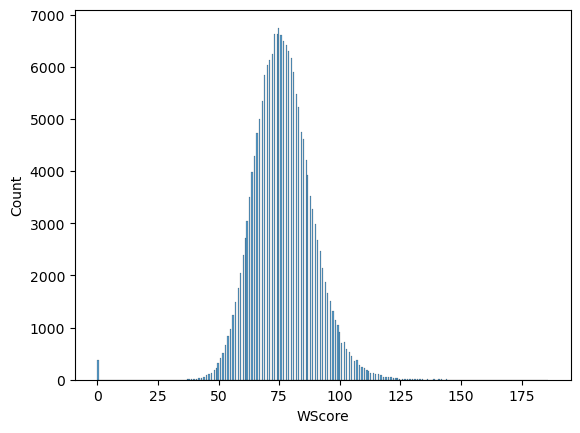

In [25]:
sns.histplot(data=df_total, x = 'WScore')

<Axes: xlabel='LScore', ylabel='Count'>

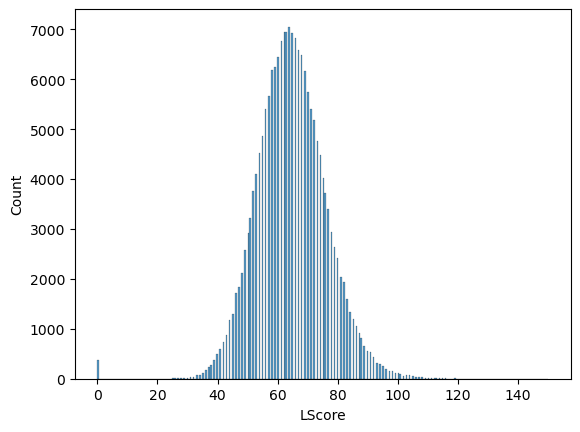

In [26]:
sns.histplot(data=df_total, x = 'LScore')

In [26]:
#sns.histplot(data=df_total, x = 'WLoc')
#ValueError: Unable to parse string "N" at position 378

/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_1970/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_1970/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_1970/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_1970/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_1970/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_1970/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


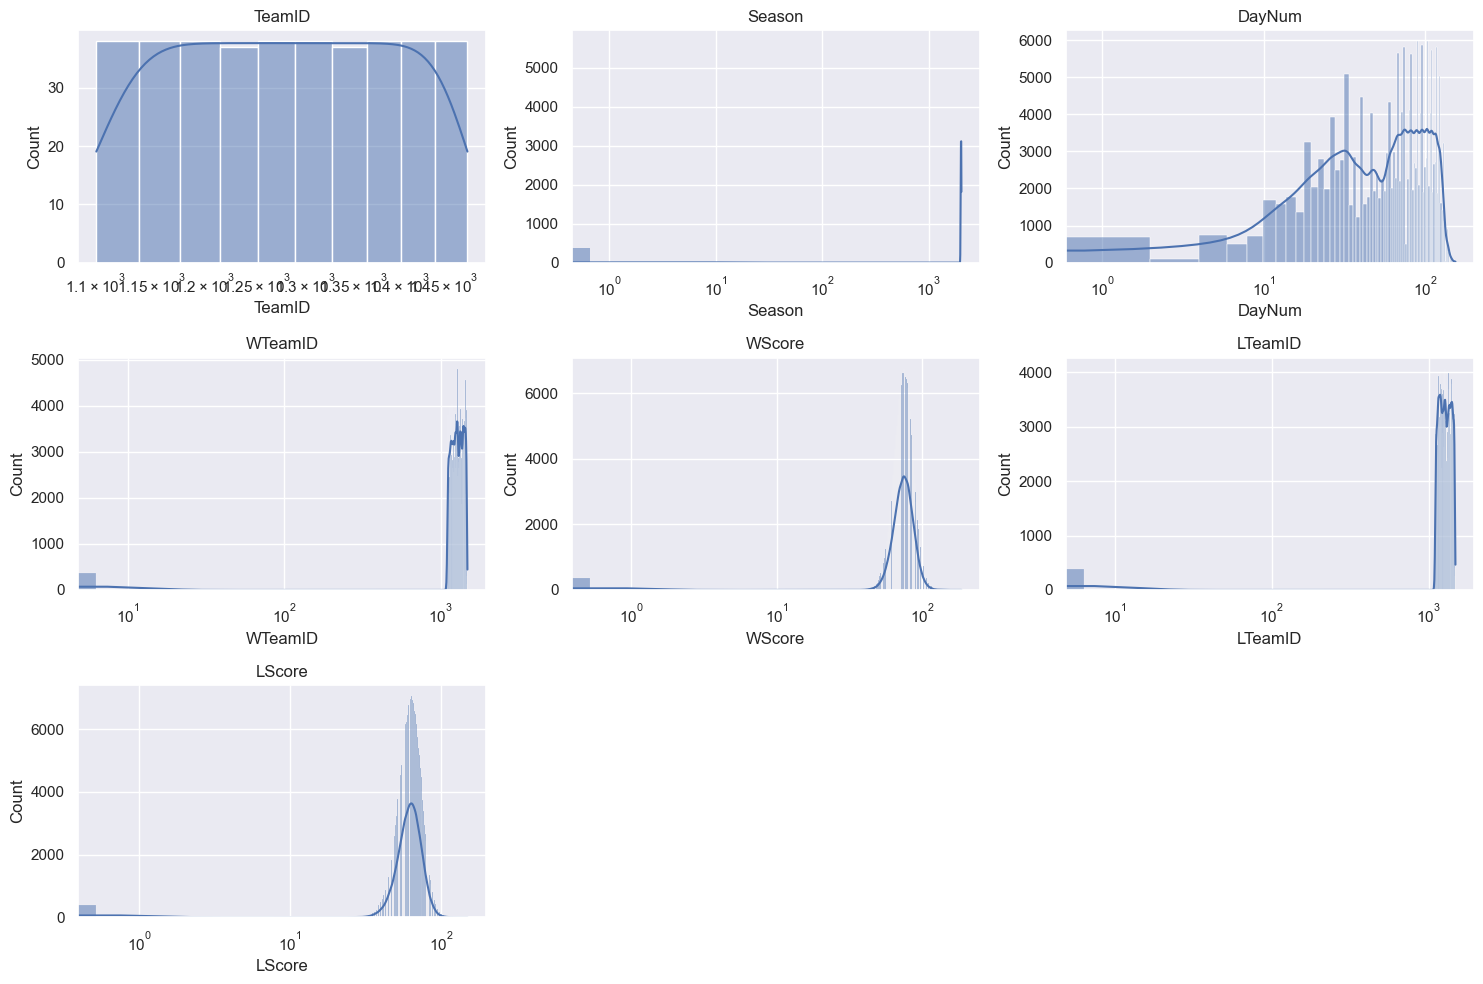

In [27]:
sns.set(style="darkgrid")

# Selecting numerical columns for distribution plots
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_total[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()

# Bivariate Analysis

<Axes: xlabel='WLoc', ylabel='WScore'>

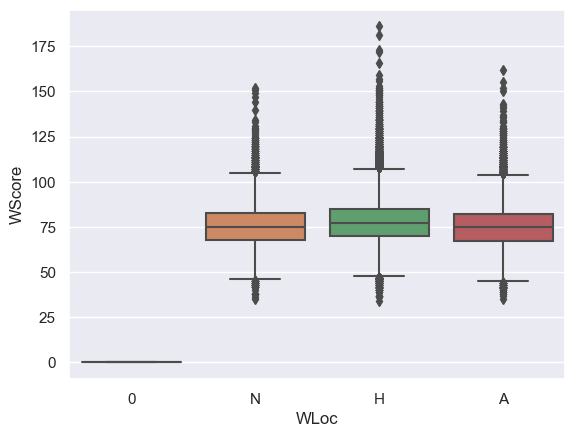

In [28]:
sns.boxplot(data=df_total, y='WScore', x ='WLoc')

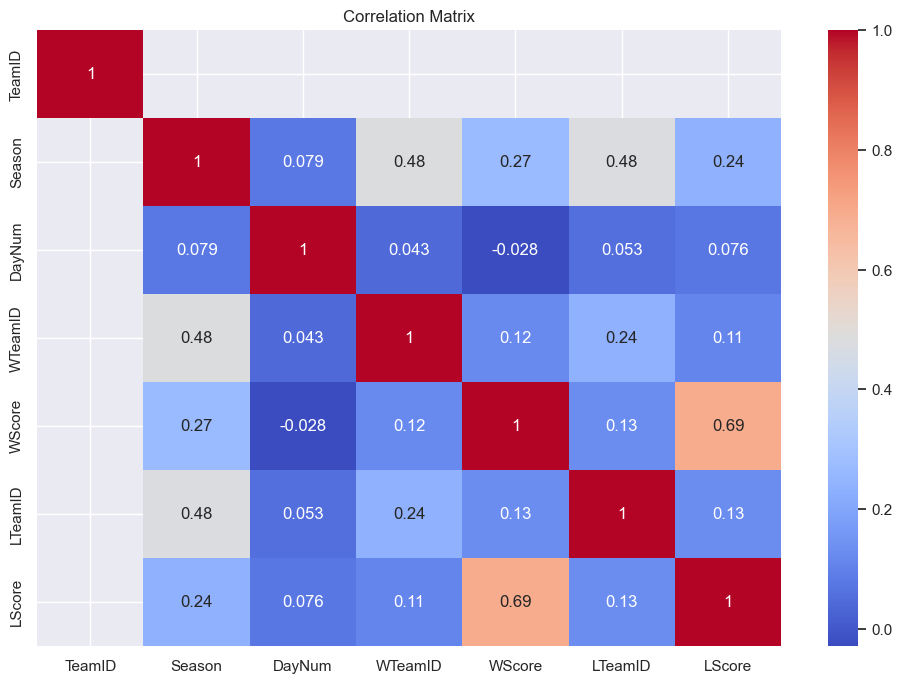

In [29]:
# Correlation Matrix
correlation_matrix = df_total.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
df_total.to_csv('../data1/df_total.csv')